# Initialization

In [31]:
# Autogenerated on 15:52:58 2016/01/25
# Regen Command:
#    /home/zach/envs/thesis/ibeis/ibeis/__main__.py --tf autogen_ipynb --db humpbacks --ipynb -t default:proot=BC_DTW -a default:has_any=hasnotch
#
# Matplotlib stuff
import matplotlib as mpl
%matplotlib inline
%load_ext autoreload
%autoreload

# Set global utool flags
import utool as ut
ut.util_io.__PRINT_WRITES__ = False
ut.util_io.__PRINT_READS__ = False
ut.util_parallel.__FORCE_SERIAL__ = True
ut.util_cache.VERBOSE_CACHE = False
ut.NOT_QUIET = False

import plottool as pt
fix_figsize = ut.partial(pt.set_figsize, w=30, h=10, dpi=256)

draw_case_kw = dict(show_in_notebook=True, annot_modes=[0, 1])

# Setup database specific parameter configurations
db = 'humpbacks'

# Pick one of the following annotation configurations
# to choose the query and database annotations
a = [
    'default:has_any=hasnotch,mingt=2'
    # See ibeis/expt/annotation_configs.py for names of annot configuration options
    #'default:has_any=(query,),dpername=1,exclude_reference=True',
    #'default:is_known=True',
    #'default:qsame_imageset=True,been_adjusted=True,excluderef=True'
    #'default:qsame_imageset=True,been_adjusted=True,excluderef=True,qsize=10,dsize=20',
    #'default:require_timestamp=True,min_timedelta=3600',
    #'default:species=primary',
    #'timectrl:',
    #'timectrl:been_adjusted=True,dpername=3',
    #'timectrl:qsize=10,dsize=20',
    #'unctrl:been_adjusted=True',
]

# Set to override any special configs
qaid_override = None
daid_override = None

# Uncomment one or more of the following pipeline configurations to choose
# how the algorithm will run.  If multiple configurations are chosen, they
# will be compared in the histograms, but only the first configuration will
# be used for inspecting results.
t = [
    'default:proot=BC_DTW,decision=average',
    'default:proot=BC_DTW,decision=max',
    'default:proot=vsmany',
    #'default',
    #'default:K=1',
    #'default:K=1,AI=False',
    #'default:K=1,AI=False,QRH=True',
    #'default:K=1,RI=True,AI=False',
    #'default:K=1,adapteq=True',
    #'default:fg_on=[True,False]',
]

# Load database for this test run
import ibeis
ibs = ibeis.opendb(db=db)

# Make notebook cells wider
from IPython.core.display import HTML
HTML("<style>body .container { width:99% !important; }</style>")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Humpback Select

In [19]:
# Tag annotations which have been given manual notch points
from ibeis_flukematch.plugin import *  # NOQA
ibs = ibeis.opendb(defaultdb='humpbacks')
all_aids = ibs.get_valid_aids()
isvalid = ibs.depc.get_property('Has_Notch', all_aids, 'flag')
aid_list = ut.compress(all_aids, isvalid)
# Tag the appropriate annots
ibs.append_annot_case_tags(aid_list, ['hasnotch'] * len(aid_list))
#depc = ibs.depc
#qaid_override = aid_list[0:5]
#daid_override = aid_list[0:7]
#print(qaid_override)
#print(daid_override)

# Pipeline Config Info

In [20]:
cfgdict_list, pipecfg_list = ibeis.expt.experiment_helpers.get_pipecfg_list(
    test_cfg_name_list=t, ibs=ibs)
ibeis.expt.experiment_helpers.print_pipe_configs(cfgdict_list, pipecfg_list)

+--- 0 / 3 ===
default:decision=average,pipeline_root=BC_DTW
BC_DTW(decision=average,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
L___
+--- 1 / 3 ===
default:decision=max,pipeline_root=BC_DTW
BC_DTW(decision=max,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
L___
+--- 2 / 3 ===
default:pipeline_root=vsmany
_vsmany_NN(single,K=4,Kn=1,padk=False,cks800)_NNWeight(lnbnn,fg,last,nosqrd_dist)_SV(0.01;2.0;1.57minIn=4,nNRR=50,nARR=6,nsum,cdl,+wi,+fc,)_AGG(nsum)_FLANN(8_kdtrees)_RRVsOne(False)_FEATWEIGHT(ON,uselabel,cnn)_FEAT(hesaff+sift_)_CHIP(sz450)
L___


# Annotation Config Info

In [21]:
acfg_list, expanded_aids_list = ibeis.expt.experiment_helpers.get_annotcfg_list(
    ibs, acfg_name_list=a, qaid_override=qaid_override, daid_override=daid_override)
ibeis.expt.annotation_configs.print_acfg_list(acfg_list, expanded_aids_list, ibs, per_qual=True)

+=== <Info acfg_list> ===
non-varied aidcfg = {
    'common': {
        '_cfgindex': 0,
        '_cfgname': 'default',
        '_cfgstr': 'default:has_any=hasnotch,mingt=2',
        'hackerrors': True,
        'has_any': 'hasnotch',
        'min_pername': 2,
        'sample_rule': 'random',
        'sample_rule_ref': 'random',
        'sample_size': 812,
        'shuffle': False,
        'view_ext': 0,
    },
    'dcfg': {
        '_cfgtype': 'dcfg',
    },
    'qcfg': {
        '_cfgtype': 'qcfg',
    },
}
+--- acfg 1 / 1 -- q_cfgname=default d_cfgname=default ---- 
acfg = {}
annot_config_stats = {
    'dbname': humpbacks,
    'num_qaids': 812,
    'num_daids': 812,
    'num_annot_intersect': 812,
    'qaid_stats': {
        'num_qaids': 812,
        'qhashid': _QSUUIDS((812)zdqomjyzqejdcomd),
        'qper_name': {max: 11, min: 2, mean: 2.77, std: 1.38, nMin: 183, nMax: 1, shape: (293,), med: 2},
        'qper_qual': {UNKNOWN: 812},
        'qper_vp': {None: 812},
    },
    'daid_st

# Timestamp Distribution

[main_helpers] testdata_expanded_aids


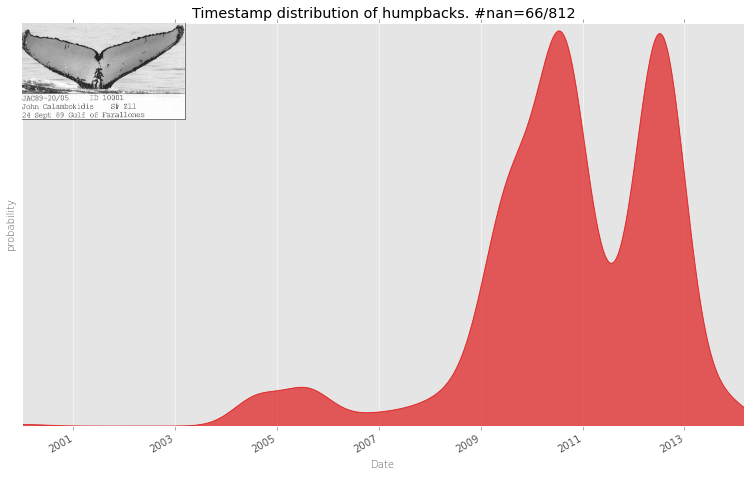

In [22]:
# Get images of those used in the tests
ibs, qaids, daids = ibeis.testdata_expanded_aids(a=a[0], ibs=ibs)
aids = ut.unique_keep_order(ut.flatten([qaids, daids]))
gids = ut.unique_keep_order(ibs.get_annot_gids(aids))
# Or just get time delta of all images
#gids = ibs.get_valid_gids()

ibeis.other.dbinfo.show_image_time_distributions(ibs, gids)
#ibeis.other.dbinfo.show_image_time_distributions(ibs, gids)

# Example Annotations / Detections

[main_helpers] testdata_expanded_aids
[0, 1, 2, 3, 4]
drawing image    1/5...  rate=15.04 Hz, etr=0:00:00, ellapsed=0:00:00, wall=18:31 EST
drawing image    2/5...  rate=9.73 Hz, etr=0:00:00, ellapsed=0:00:00, wall=18:31 EST
drawing image    3/5...  rate=12.46 Hz, etr=0:00:00, ellapsed=0:00:00, wall=18:31 EST
drawing image    4/5...  rate=17.82 Hz, etr=0:00:00, ellapsed=0:00:00, wall=18:31 EST
drawing image    5/5...  rate=16.57 Hz, etr=0:00:00, ellapsed=0:00:00, wall=18:31 EST


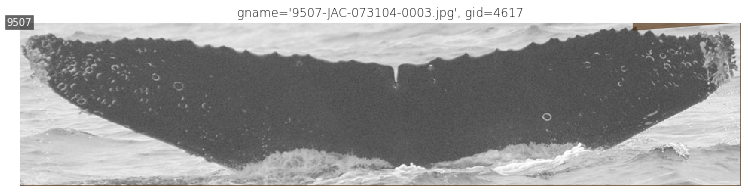

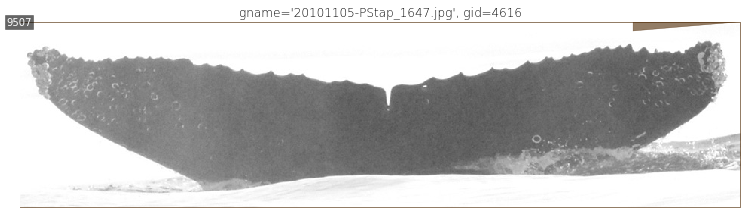

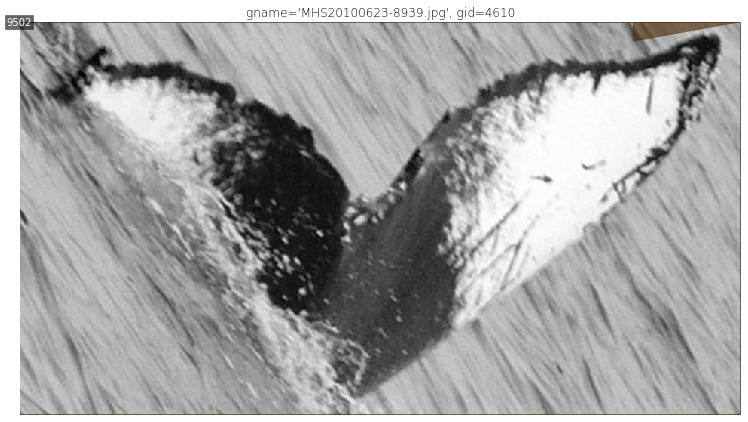

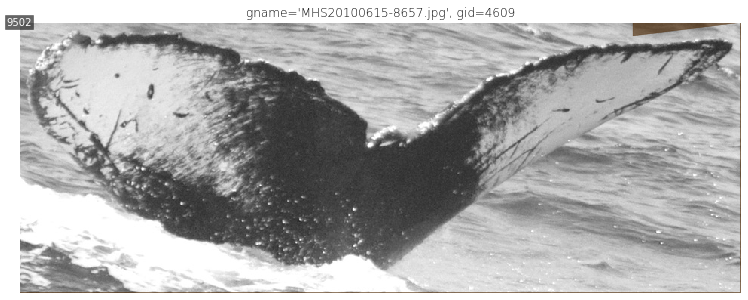

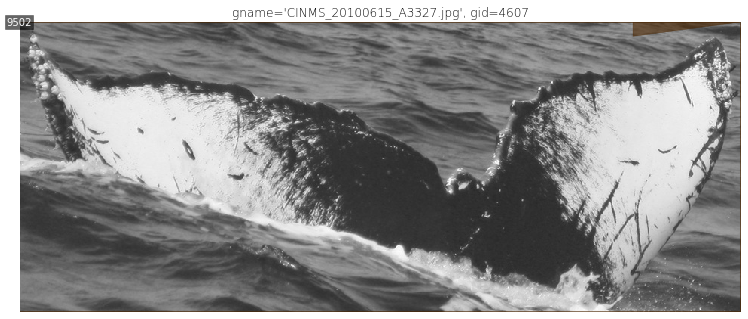

In [23]:
# Get a sample of images
#gids = ibs.get_valid_gids()
ibs, qaids, daids = ibeis.testdata_expanded_aids(a=a[0], ibs=ibs)
aids = ut.unique_keep_order(ut.flatten([qaids, daids]))
gids = ut.unique_keep_order(ibs.get_annot_gids(aids))
# Or just get time delta of all images
#gids = ibs.get_valid_gids()

aids = ibs.get_image_aids(gids)

nAids_list = list(map(len, aids))
gids_sorted = ut.sortedby(gids, nAids_list)[::-1]
samplex = list(range(5))
print(samplex)
gids_sample = ut.take(gids_sorted, samplex)

import ibeis.viz
for gid in ut.ProgressIter(gids_sample, lbl='drawing image'):
    ibeis.viz.show_image(ibs, gid)

# Example Name Graph

[main_helpers] testdata_expanded_aids
Sampling could not get exactly right sample size
aids = [634, 636, 638, 1233, 1234, 2013, 2014, 2344, 2346, 2348, 2349, 2350, 2351, 2354, 2357, 2775, 2777, 4169, 4171]
make_netx_graph
[viz_graph] drawing chip graph
zoom = 0.4
make_netx_graph


NameError: global name 'dot_parser' is not defined

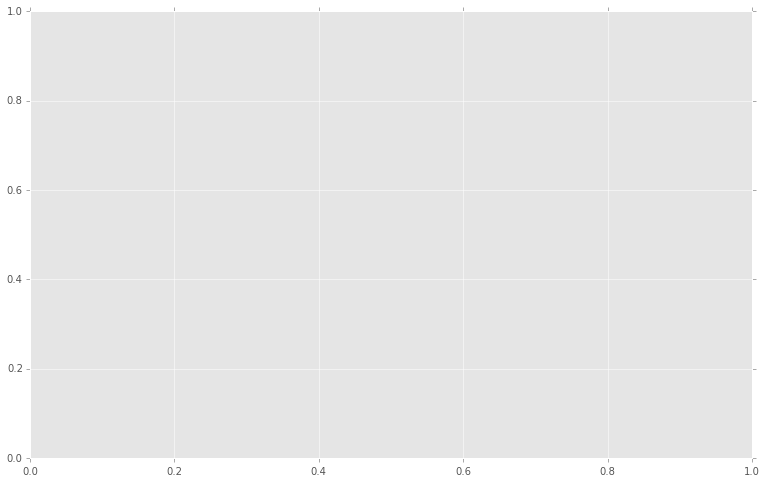

In [16]:
from ibeis.viz import viz_graph
ibs, qaids, daids = ibeis.testdata_expanded_aids(a=a[0], ibs=ibs)
aids = ut.unique_keep_order(ut.flatten([qaids, daids]))
# Sample some annotations
aids = ibs.sample_annots_general(aids, filter_kw=dict(sample_size=20, min_pername=2), verbose=False)
# Visualize name graph
namegraph = viz_graph.make_name_graph_interaction(ibs, aids=aids, zoom=.4)
fix_figsize()

# Query Accuracy (% correct annotations)

Equivalent Command Line:
ibeis -e rank_cdf --db humpbacks -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=[average,max] default:proot=vsmany --show
[main_helpers] testdata_expts
CORRUPTED? fpath = localdata/BIG_TEST_CACHE2/BIGTESTCACHE2humpbacks_cfgs((3)gnmurgifysrcyzwn).cPkl
testnameid="humpbacks ['default:proot=BC_DTW,decision=[average,max]', 'default:proot=vsmany']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((812)dxkyvwbxjqjzakjq)_DVUUIDS((812)dxkyvwbxjqjzakjq)
pipe_cfgstr= BC_DTW(decision=average,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
pipe_hashstr = kuyixmznyrewdllx
testnameid="humpbacks ['default:proot=BC_DTW,decision=[average,max]', 'default:proot=vsmany']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((812)dxkyvwbxjqjzakjq)_DVUUIDS((812)dxkyvwbxjqjzakjq)
pipe_cfgstr= BC_DTW(decision=max,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
pipe_hashstr = khnblgkjxsqfxjrj
testnameid="humpbacks ['default:

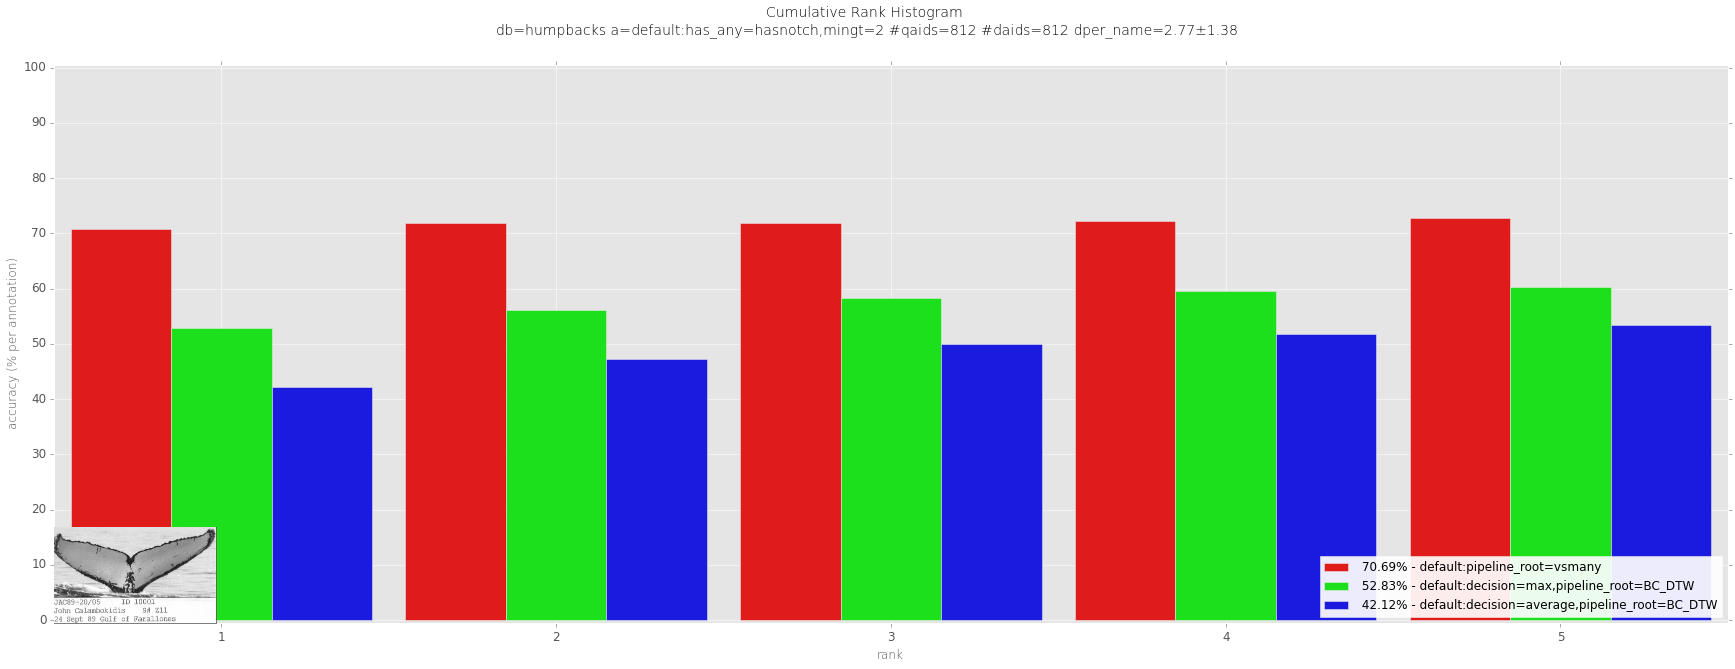

In [26]:
testres = ibeis.run_experiment(
    e='rank_cdf',
    db=db, a=a, t=t, qaid_override=qaid_override, daid_override=daid_override)
#testres.print_unique_annot_config_stats()
_ = testres.draw_func()
fix_figsize()

# Query Accuracy (% correct names)

Equivalent Command Line:
ibeis -e rank_cdf --db humpbacks -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=[average,max] default:proot=vsmany --show
[main_helpers] testdata_expts
CORRUPTED? fpath = localdata/BIG_TEST_CACHE2/BIGTESTCACHE2humpbacks_cfgs((3)gnmurgifysrcyzwn).cPkl
testnameid="humpbacks ['default:proot=BC_DTW,decision=[average,max]', 'default:proot=vsmany']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((812)dxkyvwbxjqjzakjq)_DVUUIDS((812)dxkyvwbxjqjzakjq)
pipe_cfgstr= BC_DTW(decision=average,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
pipe_hashstr = kuyixmznyrewdllx
testnameid="humpbacks ['default:proot=BC_DTW,decision=[average,max]', 'default:proot=vsmany']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((812)dxkyvwbxjqjzakjq)_DVUUIDS((812)dxkyvwbxjqjzakjq)
pipe_cfgstr= BC_DTW(decision=max,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
pipe_hashstr = khnblgkjxsqfxjrj
testnameid="humpbacks ['default:

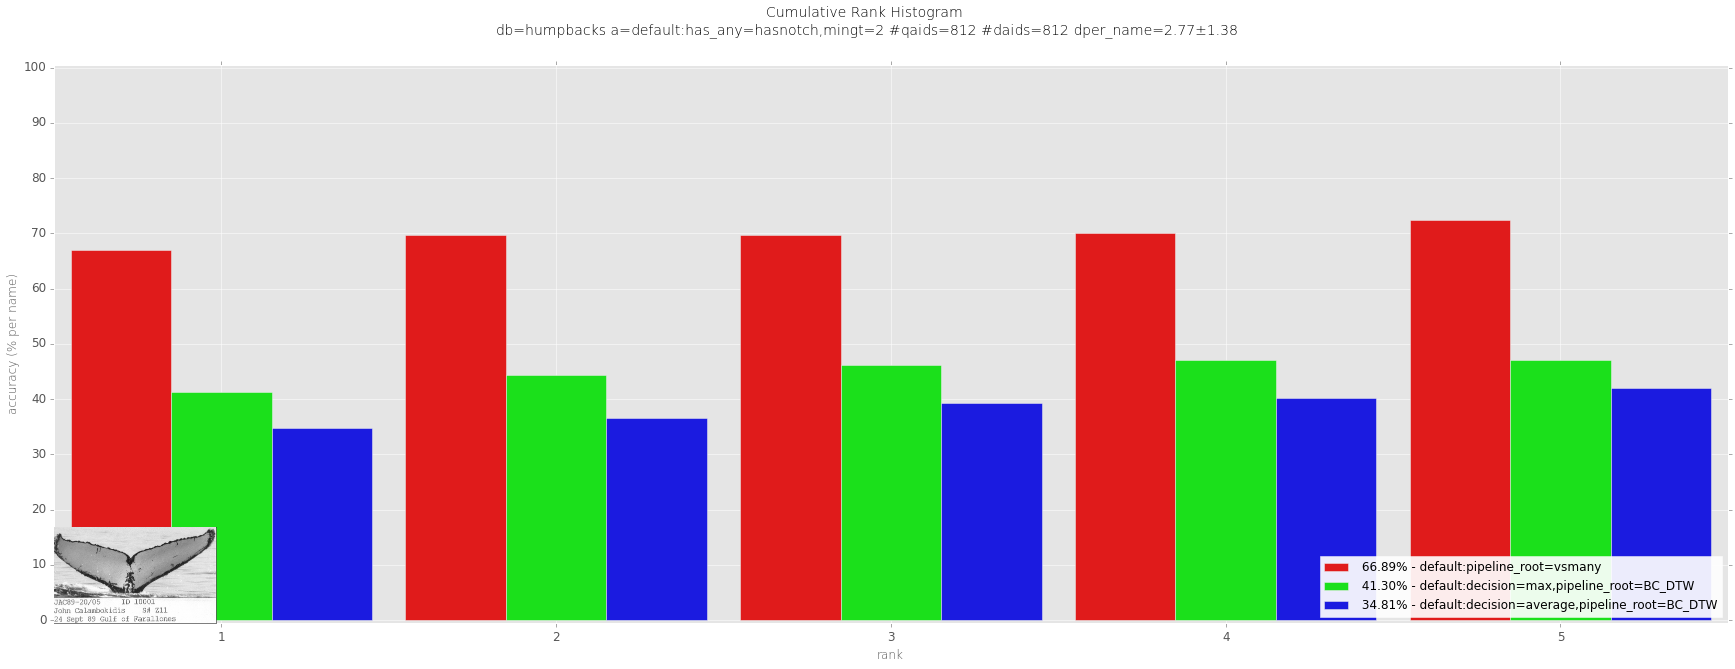

In [27]:
testres = ibeis.run_experiment(
    e='rank_cdf',
    db=db, a=a, t=t, do_per_annot=False, qaid_override=qaid_override, daid_override=daid_override)
#testres.print_unique_annot_config_stats()
_ = testres.draw_func()
fix_figsize()

# Result Timedelta Distribution

Equivalent Command Line:
ibeis -e timedelta_hist --db humpbacks -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=average --show
[main_helpers] testdata_expts
CORRUPTED? fpath = localdata/BIG_TEST_CACHE2/BIGTESTCACHE2humpbacks_cfgs((1)oqthhxfrpsexzqrz).cPkl
testnameid="humpbacks ['default:proot=BC_DTW,decision=average']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((812)dxkyvwbxjqjzakjq)_DVUUIDS((812)dxkyvwbxjqjzakjq)
pipe_cfgstr= BC_DTW(decision=average,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
pipe_hashstr = kuyixmznyrewdllx

+------

<!!! WARNING !!!>
[!run_test_configurations] error saving testres cache
<class 'cPickle.PicklingError'>: Can't pickle <class 'dtool.depcache_control.BC_DTWConfig'>: attribute lookup dtool.depcache_control.BC_DTWConfig failed
</!!! WARNING !!!>

L______

-a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=average --db humpbacks


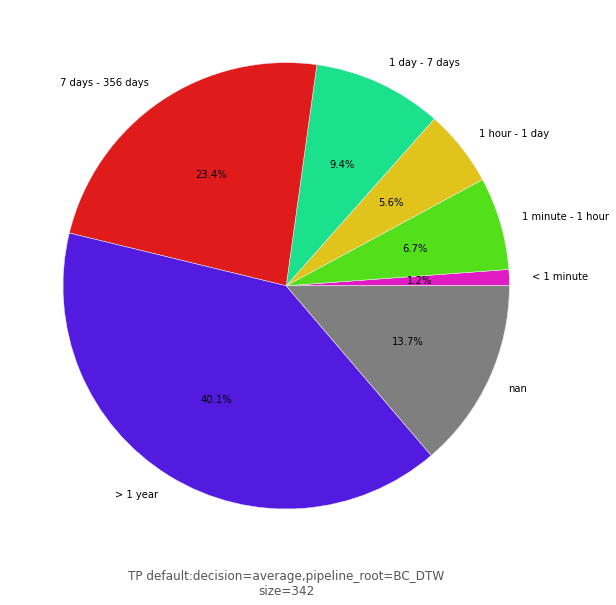

In [32]:
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db,
    a=a[0:1],
    t=t[0:1],
    qaid_override=qaid_override, daid_override=daid_override,
    truepos=True)
test_result.draw_func()
fix_figsize()

# Configuration Overlap

In [29]:
# How well do different configurations compliment each other?
testres.print_config_overlap()

Config Overlap
cfgx1 and cfgx2 have <x> not in common
disjoint_mat =
[[  0 171 398]
 [171   0 327]
 [398 327   0]]
cfgx1 helps cfgx2 by <x>
disjoint_mat2 =
[[  0  42  83]
 [129   0  91]
 [315 236   0]]
best_cfgx = 2
cfgx 0) has 83 success cases that that the best config does not have -- default:decision=average,pipeline_root=BC_DTW+default:
cfgx 1) has 91 success cases that that the best config does not have -- default:decision=max,pipeline_root=BC_DTW+default:


# All Score Distribution

Equivalent Command Line:
ibeis -e scores --db humpbacks -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=average -f :fail=None,min_gf_timedelta=None --show
[main_helpers] testdata_expts
CORRUPTED? fpath = localdata/BIG_TEST_CACHE2/BIGTESTCACHE2humpbacks_cfgs((1)oqthhxfrpsexzqrz).cPkl
testnameid="humpbacks ['default:proot=BC_DTW,decision=average']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((812)dxkyvwbxjqjzakjq)_DVUUIDS((812)dxkyvwbxjqjzakjq)
pipe_cfgstr= BC_DTW(decision=average,version=2,weights=None,verbose=False,sizes=(5, 10, 15, 20))
pipe_hashstr = kuyixmznyrewdllx

+------

<!!! WARNING !!!>
[!run_test_configurations] error saving testres cache
<class 'cPickle.PicklingError'>: Can't pickle <class 'dtool.depcache_control.BC_DTWConfig'>: attribute lookup dtool.depcache_control.BC_DTWConfig failed
</!!! WARNING !!!>

L______

-a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=average --db humpbacks
filt_cfg = {u'min_gf_timedelta':

ValueError: Colormap inferno is not recognized. Possible values are: Spectral, summer, coolwarm, Wistia_r, pink_r, Set1, Set2, Set3, brg_r, Dark2, prism, PuOr_r, afmhot_r, terrain_r, PuBuGn_r, RdPu, gist_ncar_r, gist_yarg_r, Dark2_r, YlGnBu, RdYlBu, hot_r, gist_rainbow_r, gist_stern, PuBu_r, cool_r, cool, gray, copper_r, Greens_r, GnBu, gist_ncar, spring_r, gist_rainbow, gist_heat_r, Wistia, OrRd_r, CMRmap, bone, gist_stern_r, RdYlGn, Pastel2_r, spring, terrain, YlOrRd_r, Set2_r, winter_r, PuBu, RdGy_r, spectral, rainbow, flag_r, jet_r, RdPu_r, gist_yarg, BuGn, Paired_r, hsv_r, bwr, cubehelix, Greens, PRGn, gist_heat, spectral_r, Paired, hsv, Oranges_r, prism_r, Pastel2, Pastel1_r, Pastel1, gray_r, jet, Spectral_r, gnuplot2_r, gist_earth, YlGnBu_r, copper, gist_earth_r, Set3_r, OrRd, gnuplot_r, ocean_r, brg, gnuplot2, PuRd_r, bone_r, BuPu, Oranges, RdYlGn_r, PiYG, CMRmap_r, YlGn, binary_r, gist_gray_r, Accent, BuPu_r, gist_gray, flag, bwr_r, RdBu_r, BrBG, Reds, Set1_r, summer_r, GnBu_r, BrBG_r, Reds_r, RdGy, PuRd, Accent_r, Blues, autumn_r, autumn, cubehelix_r, nipy_spectral_r, ocean, PRGn_r, Greys_r, pink, binary, winter, gnuplot, RdYlBu_r, hot, YlOrBr, coolwarm_r, rainbow_r, Purples_r, PiYG_r, YlGn_r, Blues_r, YlOrBr_r, seismic, Purples, seismic_r, RdBu, Greys, BuGn_r, YlOrRd, PuOr, PuBuGn, nipy_spectral, afmhot

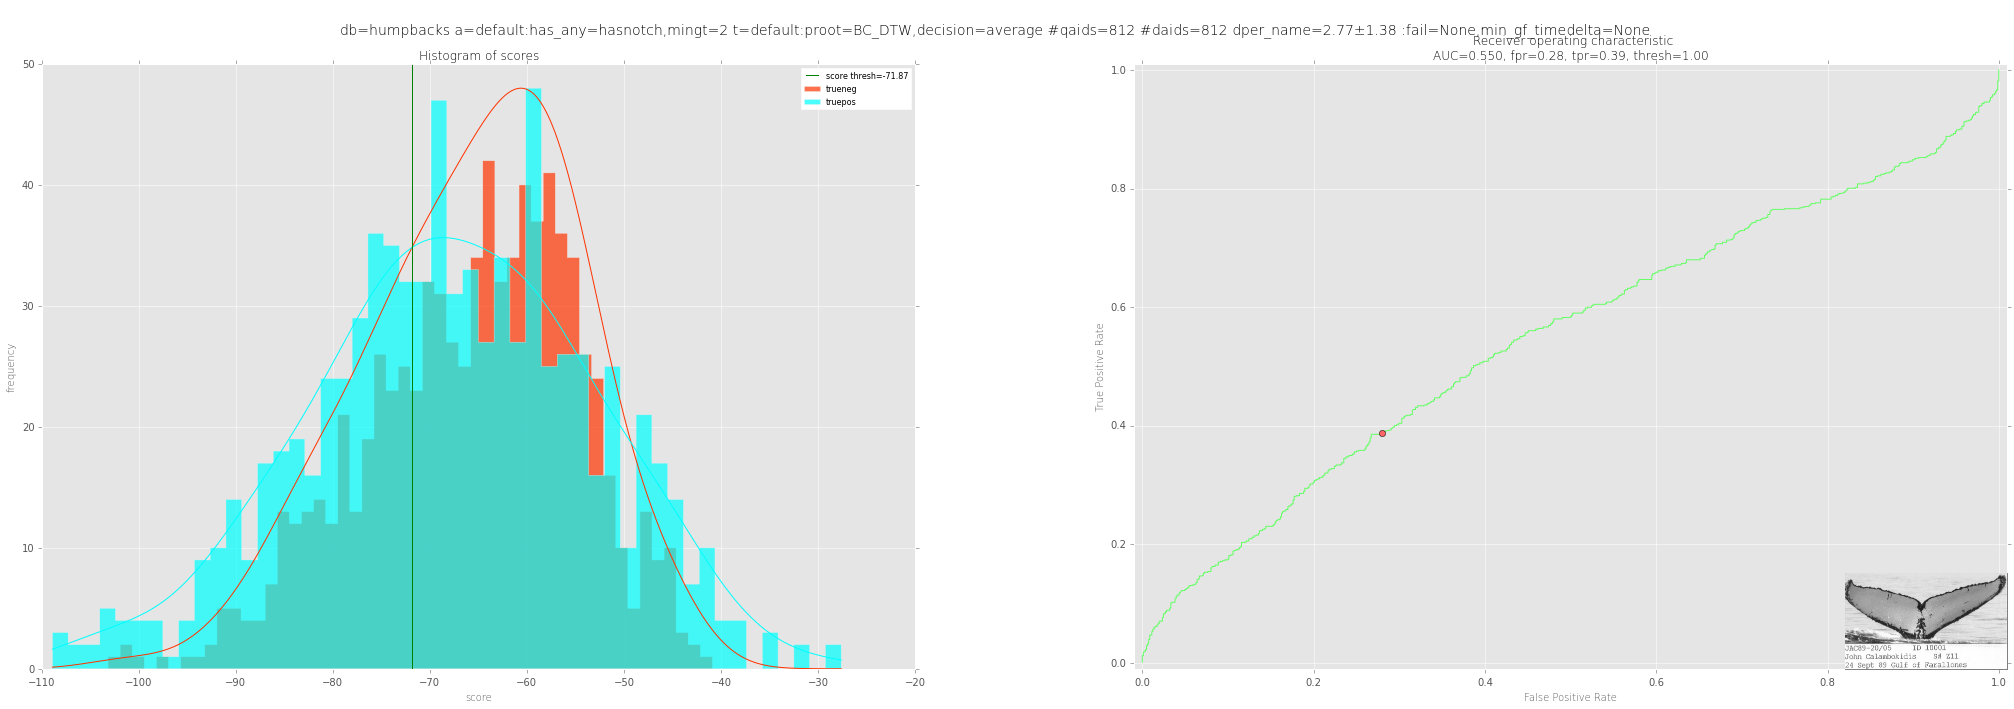

In [33]:
testres = ibeis.run_experiment(
    e='scores',
    db=db, a=a[0:1], t=t[0:1],
    qaid_override=qaid_override, daid_override=daid_override,
    f=[':fail=None,min_gf_timedelta=None']
)
_ = testres.draw_func()
fix_figsize()
testres.draw_taghist()()
fix_figsize()

# Scores of Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_annot_scoresep',
    db=db, a=a[0:1], t=t[0:1],
    f=[':fail=False,min_gf_timedelta=None'],
)
_ = testres.draw_func()
fix_figsize()

# Cases: Top Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t[0:1],
    f=[':fail=False,index=0:3,sortdsc=gtscore,max_pername=1'],
    figsize=(30, 8),
    **draw_case_kw)

_ = testres.draw_func()

# Cases: Challenging Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t[0:1],
    f=[':fail=False,index=0:3,sortasc=gtscore,max_pername=1'],
    figsize=(30, 8),
    **draw_case_kw)

_ = testres.draw_func()

# Cases: Failure (false pos)

In [ ]:
testres = ibeis.run_experiment(
e='draw_cases',
db=db, a=a[0:1], t=t[0:1],
f=[':fail=True,index=0:3,sortdsc=gfscore,max_pername=1'],
figsize=(30, 8),
**draw_case_kw)
_ = testres.draw_func()

# Cases: Failure (false neg)

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t[0:1],
    f=[':fail=True,index=0:3,sortdsc=gtscore,max_pername=1'],
    figsize=(30, 8),
    **draw_case_kw)
_ = testres.draw_func()